### Aayushi Gupta

## DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP AT THE SPARKS FOUNDATION 

### Task : 2

### Prediction using Unsupervised ML

### From the given IRIS dataset , Predict  the optimum number of clusters and represent it visually.





In [1]:
#Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

### Reading The Data From Data Source

In [2]:
#Load the Dataset
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Dataset size

In [5]:
df.shape

(150, 4)

### Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Dataset Description - 5 point summary

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The features petal length and petal width are slightly left skewed

In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

### Exploratory Data Analysis

### Univariate Analysis

C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


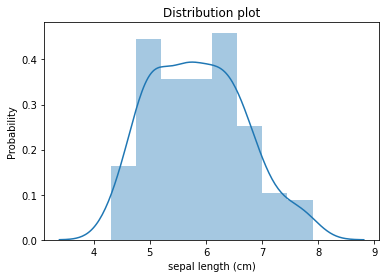

In [9]:
sns.distplot(df['sepal length (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('Probability')
plt.title('Distribution plot')
plt.show()


C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


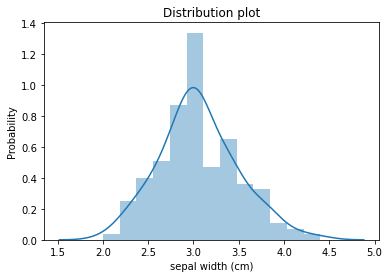

In [10]:
sns.distplot(df['sepal width (cm)'])
plt.xlabel('sepal width (cm)')
plt.ylabel('Probability')
plt.title('Distribution plot')
plt.show()

C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


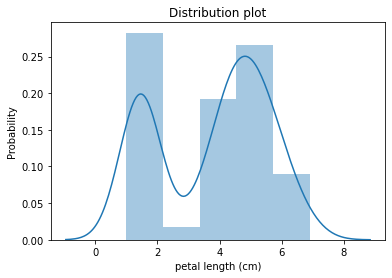

In [11]:
sns.distplot(df['petal length (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('Probability')
plt.title('Distribution plot')
plt.show()

C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


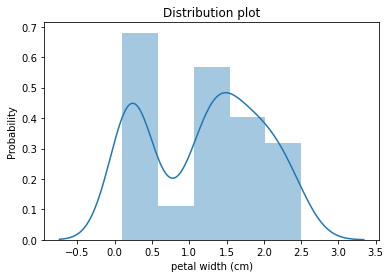

In [12]:
sns.distplot(df['petal width (cm)'])
plt.xlabel('petal width (cm)')
plt.ylabel('Probability')
plt.title('Distribution plot')
plt.show()

### Multivariate Analysis

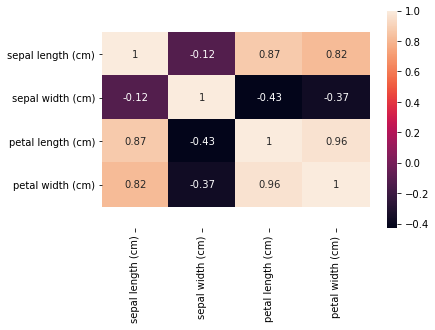

In [13]:
ax = sns.heatmap(df.corr(),annot = True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

a. There is a high positive correlation between:

    1. sepal length and petal width
    2. petal length and petal width
    3. sepal length and petal length
    
b. There is a negative correlation between:

    1. sepal width and petal width
    2. sepal width and petal length
    3. sepal length and sepal width

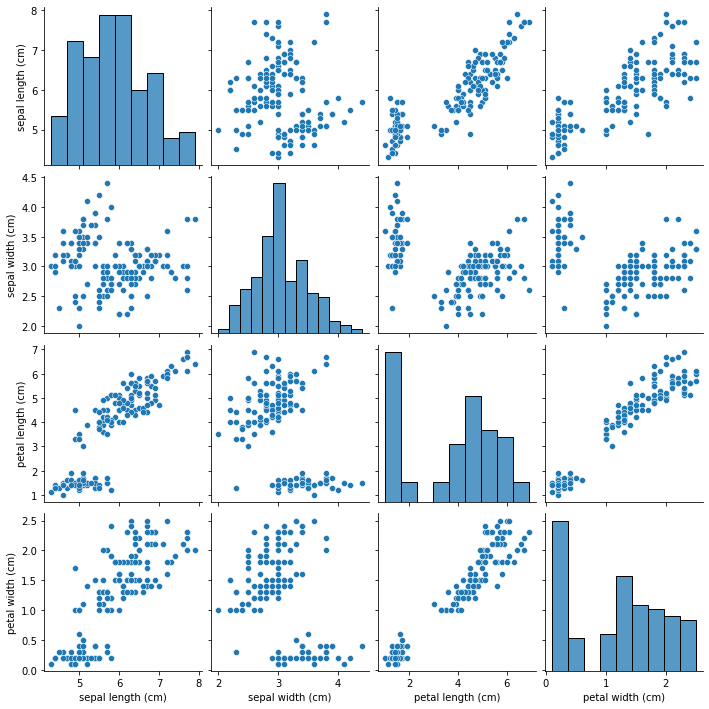

In [14]:
sns.pairplot(df)
plt.show()

From the pairplot, it can be visually seen that can be atleast 2 diffrent clusters.

### Checking for the multicollinearity

In [15]:
import statsmodels.api as sm
xc = sm.add_constant(df)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor (xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame({'VIF':vif[1:]},index = df.columns)

,VIF
sepal length (cm),7.072722
sepal width (cm),2.100872
petal length (cm),31.261498
petal width (cm),16.090175


There is high multicollinearity observed. Thus, PCA can be applied

### Data Preparation - 

1. Standard Scaling
2. PCA application

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [18]:
dfs = ss.fit_transform(df)
dfs = pd.DataFrame(dfs)
dfs.columns = df.columns
dfs.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [19]:
from sklearn.decomposition import PCA
pca = PCA()

In [20]:
pca.fit(dfs)

PCA()

In [21]:
pd.DataFrame({'Eigen values': pca.explained_variance_,
              'Proportion Explained':pca.explained_variance_ratio_,
              'Cumulative proportion explained':np.cumsum(pca.explained_variance_ratio_)})

,Eigen values,Proportion Explained,Cumulative proportion explained
0,2.938085,0.729624,0.729624
1,0.920165,0.228508,0.958132
2,0.147742,0.036689,0.994821
3,0.020854,0.005179,1.000000


The first 2 PC's explain 95% of variation. Thus, considering only PC1 and PC2

In [22]:
pca = PCA(0.95)
df_pca = pca.fit_transform(dfs)
cols = list(dfs.columns)
PCA_df = pd.DataFrame(pca.components_.T,index = cols,columns=['PC1','PC2']).reset_index().rename(columns={'index':'Features'})
PCA_df

,Features,PC1,PC2
0,sepal length (cm),0.521066,0.377418
1,sepal width (cm),-0.269347,0.923296
2,petal length (cm),0.580413,0.024492
3,petal width (cm),0.564857,0.066942


From above table:

1. PC1 explains 0.521 variation for sepal length, -0.269 variation for sepal width and so on
2. Out of the total variation in the sepal width, 0.521 is explained by PC1 and 0.377 is explained by PC2, so on and so    forth

### KMeans Clustering

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(random_state = 0)

In [24]:
wcss = []
sil_score = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    sil_score.append(silhouette_score(df_pca,kmeans.labels_))
print(wcss,'\n',sil_score)    

[197.40381604541292, 115.02075663594017, 89.50648217471635, 66.19922345328752, 57.15909359611549, 47.74155037442987, 39.106342519435614, 32.102479538411295, 28.477090121861306, 25.271280325774697, 22.664031206361027, 19.7479369499265, 18.081799265827513] 
 [0.6145202036230452, 0.5091683341538228, 0.4415870071606702, 0.4155557619864793, 0.41397681358796184, 0.43448953882460256, 0.44235032248100215, 0.4375344368076236, 0.4331873654373075, 0.42997772442098714, 0.4248855818879573, 0.4360192548421211, 0.4305100512911094]


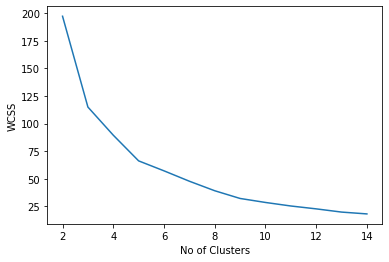

In [25]:
#Elbow plot
plt.plot(range(2,15),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

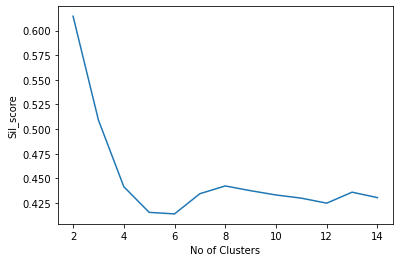

In [26]:
#Silhouette Score
plt.plot(range(2,15),sil_score)
plt.xlabel('No of Clusters')
plt.ylabel('Sil_score')
plt.show()

From above two graphs, the number of clusters can be taken  as 3

In [27]:
kmeans = KMeans(n_clusters=3,n_init=15,random_state=0)
kmeans.fit(df_pca)

KMeans(n_clusters=3, n_init=15, random_state=0)

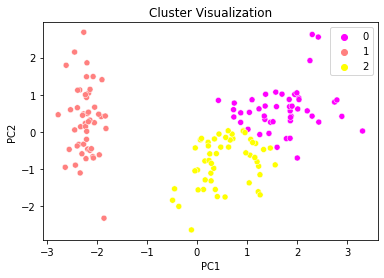

In [28]:
pd.Series(kmeans.labels_).value_counts()
sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1],hue=kmeans.labels_,palette='spring')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Visualization')
plt.show()

Thus, it is seen that after standard scaling and applying PCA, 3 clusters are formed which can be visually seen in the above plot.

In [29]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1
0,1.721037,0.602887
1,-2.224753,0.288927
2,0.572621,-0.807209


In case of both the PCs, the controls are far apart from eachother.Thus, well diffentiated clusters

In [30]:
df['labels']=kmeans.labels_

In [31]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [32]:
df.groupby('labels').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
labels,,,,
0,6.780851,3.095745,5.510638,1.972340
1,5.006000,3.428000,1.462000,0.246000
2,5.801887,2.673585,4.369811,1.413208


With regards to 3 clusters, below are some observations:
    
   1. The sepal length of flowers in cluster 0 is largest.
   2. The sepal width of flowers in cluster 2 is smallest.
   3. The petal length of flowers in cluster 1 is the largest.This was to happen as sepal length and petal length are highly correlated.
   4. The petal width of flowers in clusters 0 is largest